# Data for research

In [1]:
# from model import *
import time
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
data = np.load('training_data.npz')

In [3]:
XTrain = data['x']
YTrain_heightmap = data['y']
YTrain_satelite = data['y_satelite']

## Check that the data is the correct size

In [4]:
XTrain.shape # 225, 225, 4 --> we have 4 channels of 4 sketches

(5462, 225, 225, 4)

In [5]:
YTrain_heightmap.shape #225, 225, 1 --> 1 channel of heightmap

(5462, 225, 225, 1)

In [6]:
YTrain_satelite.shape #225, 225, 3 --> 3 channel of satelite (RGB)

(5465, 225, 225, 3)

In [7]:
YTrain_satelite = np.delete(YTrain_satelite, 2285, axis=0)

In [22]:
YTrain_satelite = np.delete(YTrain_satelite, 2723, axis=0)

## Preperation data
We want to resize our training data for the research we are doing. It takes almost 2 days to train our model on a full data set. At the moment, we would like to reduce this time to a few hours to fine-tune our model. 
Let's focus on areas with compose pixels light and dark.

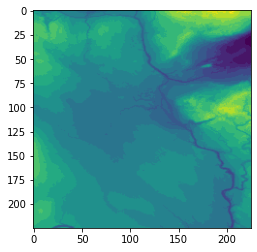

In [144]:
test_img = YTrain_heightmap[10]
plt.imshow(test_img)

171.4122864197531


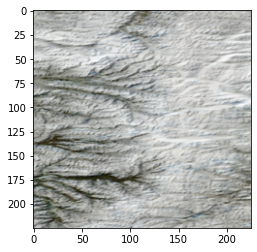

In [110]:
print(YTrain_satelite[list_of_best_idx[230]].mean())
plt.imshow(YTrain_satelite[list_of_best_idx[230]])

In [8]:
def big_empty_area(image, size_area=0.3):
    width, height = image.shape[0], image.shape[1] 
    for w in range(width):
        list_values_on_width_pixels = [i+1 for i in range(height-1) if image[w][i] != image[w][i+1]]
        if len(list_values_on_width_pixels) >1:
            the_most_popular_vales = np.max([list_values_on_width_pixels[i+1]-list_values_on_width_pixels[i] for i in range(len(list_values_on_width_pixels)-1)])
            if the_most_popular_vales/height >= size_area:
                return False
        else:
            return False
    return True

def dark_areas_image(image, limit=8000):
    unique, count = np.unique(image<0, return_counts=True)
    diff = np.diff(count)
    if diff > (-1)*limit and diff < limit:
        return True
    return False

def isArctic(image_satelite):
    return image_satelite.mean()<215

def preperation_research_data(data_image_heightmap, data_image_satelite, limit=8000, size_area=0.3, with_arctic=False):
    list_of_idx_image = []
    for idx in range(len(data_image_heightmap)):
        if dark_areas_image(data_image_heightmap[idx], limit=limit) and big_empty_area(data_image_heightmap[idx], size_area=size_area):
            if with_arctic:
                list_of_idx_image.append(idx)
            else:
                if isArctic(data_image_satelite[idx]):
                    list_of_idx_image.append(idx)
    return list_of_idx_image

In [9]:
%%time
list_of_best_idx = preperation_research_data(YTrain_heightmap, YTrain_satelite, limit=15000, size_area=0.4, with_arctic=False)

Wall time: 27.2 s


In [31]:
# for i in range(len(list_of_best_idx)):
#     fig, axis=plt.subplots(nrows=1, ncols=2 ,facecolor='white', figsize=(8,4))
#     axis[0].imshow(YTrain_heightmap[list_of_best_idx[i]])
#     axis[1].imshow(YTrain_satelite[list_of_best_idx[i]])
#     fig.suptitle(i)
#     plt.savefig('yTrain_{}.png'.format(i), facecolor=fig.get_facecolor(), transparent=True)

In [114]:
print('Origin size:',YTrain_heightmap.shape[0], '  New size:', len(list_of_best_idx))

Origin size: 5462   New size: 485


In [115]:
np.savez('training_data_research.npz', x_sketch=XTrain[list_of_best_idx], y_heightmap=YTrain_heightmap[list_of_best_idx], y_satelite=YTrain_satelite[list_of_best_idx])

3786


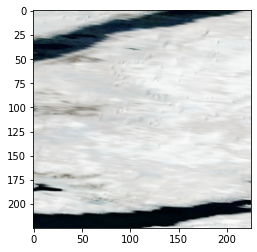

In [28]:
print(list_of_best_idx[351])
plt.imshow(YTrain_satelite[list_of_best_idx[351]])

In [30]:
for i in np.arange(3440, 3786):
    fig, axis=plt.subplots(nrows=1, ncols=2 ,facecolor='white', figsize=(8,4))
    axis[0].imshow(YTrain_heightmap[i])
    axis[1].imshow(YTrain_satelite[i])
    fig.suptitle(i)